In [81]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, expon, norm, uniform, weibull_min, mode

___

## Задание 1: Визуальный анализ распределений случайных величин
### Постройте гистограмы для следующих распределений:
1. Равномерное с параметрами (0, 1)
2. Нормальное распределение с параметрами mu=0, sigma=1
3. Распределение Вейбулла с x = 10, c = 7 (взять функцию weibull_min из scipy.stats)

___

Text(0.5, 1.0, 'Task 3. Weibull Distribution')

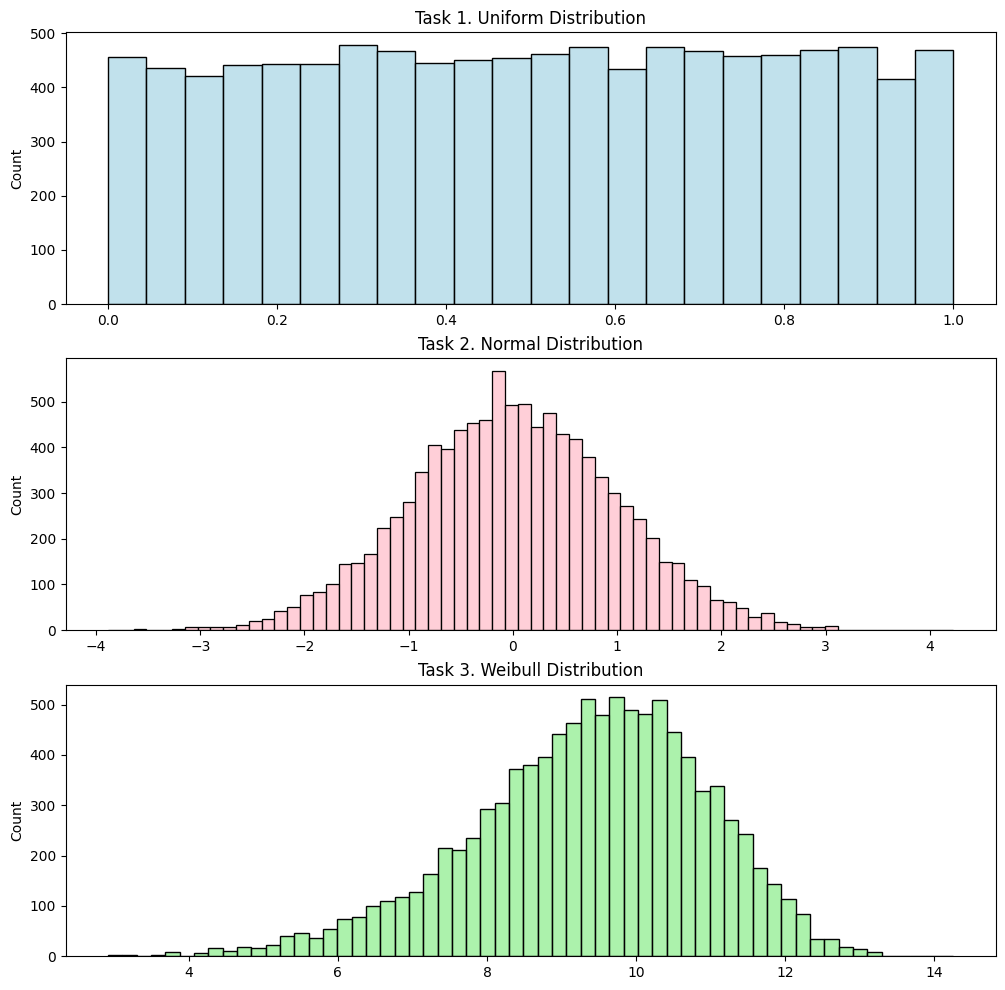

In [82]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12))
sns.histplot(uniform.rvs(size=10000), color='lightblue', ax=axs[0]).set_title('Task 1. Uniform Distribution')
sns.histplot(norm.rvs(size=10000), color='pink', ax=axs[1]).set_title('Task 2. Normal Distribution') #параметры 0 и 1 задаются по умолчанию
sns.histplot(weibull_min.rvs(scale=10, c=7, size=10000), color='lightgreen', ax=axs[2]).set_title('Task 3. Weibull Distribution')

## Задание 2: Свойства нормального распределения
### Случайная величина имеет нормальное распределение с параметрами mu = 10, sigma = 2.
1. Дайте текстовый ответ, что такое "Правило трёх сигм"?
2. Рассчитайте вероятность того, что случайная величина примет значение больше 16. (Поможет метод cdf)
3. Какому значению случайной величины соответствует 5-й персентиль функции распределения? (Поможет метод ppf)
4. Рассчитайте точную оценку вероятности того, что случайная величина из нормального распределения с такими параметрами не отклонится от математического ожидания больше чем на 2 сигмы. А на 1 сигму?

___

1. Правило трёх сигм говорит, что с вероятностью приблизительно 0,9973 нормально распределённая случайная величина лежит на расстоянии не более трёх сигм от матожидания (то есть $\in [\mu -3\sigma; \mu +3\sigma]$, где $\sigma^2 = D[x]$ - дисперсия рассматриваемой случайной величины, а $\mu = E[x]$ - её матожидание)

In [83]:
x = norm(loc = 10, scale=2)
print("2. Вероятность того, что случайная величина > 16:", 1 - x.cdf(16))
print("3. 5-ый перцентиль соответствует значению ", x.ppf(0.05))
print("4. Вероятность того, что случайная величина не отклонится от матожидания больше, чем на 1 сигму", x.cdf(x.mean() + x.std()) - x.cdf(x.mean() - x.std()))
# можно было бы захардкодить и написать x.cdf(12) -x.cdf(8)
print("   Вероятность того, что случайная величина не отклонится от матожидания больше, чем на 2 сигмы", x.cdf(x.mean() + 2*x.std()) - x.cdf(x.mean() - 2*x.std()))

2. Вероятность того, что случайная величина > 16: 0.0013498980316301035
3. 5-ый перцентиль соответствует значению  6.710292746097054
4. Вероятность того, что случайная величина не отклонится от матожидания больше, чем на 1 сигму 0.6826894921370859
   Вероятность того, что случайная величина не отклонится от матожидания больше, чем на 2 сигмы 0.9544997361036416


## Задание 3: Зависимые случайные величины
### Что такое зависимые случайные величины, дайте развёрнутый текстовый ответ?

Пусть имеется случайная величина ${X}$ из равномерного распределения с параметрами (0, 1). Вторая случайная величина, ${Y}$, получена путём возведения первой в квадрат и прибавления единицы. Будут ли эти случайные величины зависимы? С помощью какой статистики можно оценить "меру зависимости" двух этих случайных величин? 

Рассмотрим случайную величину ${X + Y}$. Напишите формулы, по которым считаются математическое ожидание и дисперсия для суммы зависимых случаных величин. Рассчитайте математическое ожидание и диспресию случайной величины ${X + Y}$, сгенерировав распределения ${X}$ и ${Y}$. Достаточно будет 1000 наблюдений.

___

1. Две случайные величины $X, Y$ называются независимыми, если независимы события ${X < x}$ и ${Y < y}$, где маленькими буквами обозначены вещественные числа. А случайные величины в свою очередь являются независимыми, если $P(AB) = P(A)P(B)$. Соответственно, если условие независимости не выполняется, то случайные величины называются зависимыми. Также эквивалетным определением независимости является то, что $F(X, Y) = F(X) * F(y)$, где F - функция распределения случайных величин.

2. Да, эти величины зависимы, так как имеет место функциональная зависимость одной величины от другой ($Y = g(X) = X^2 + 1$), а из неё всегда следует и статистическая зависимость. Если опустить этот факт и попытаться доказать зависимость величин по определению выше, можно рассмотреть $P(X < x, Y < y)$. Так как X распределена равномерно с параметрами (0,1), а Y выражается через X, то $P(X < 0.5, Y < 1.25) = 0.5, при этом $P(X < 0.5) \cdot P(Y < 1.25) = P(X < 0.5) \cdot P(X^2 + 1 < 1.25) = 0.25$, а $0.5 \neq 0.25$. 

    Меру зависимости можно оценить с помощую корреляции. Коэффициент корреляции бывает разным (например, корреляция Пирсона), но так или иначе он выражает то, насколько зависят случайные величины.

3. $E[X + Y] = E[X] + E[Y]$ (даже для зависимых случайных величин матожидание линейно)

   В нашем случае $E[X] = 0.5$, $E[Y] = E[X^2 + 1] = E[X^2] + E[1] = 1.(3)$ (посчитала интеграл $\int_{-\infty}^{+\infty}x^2f(x)dx = \int_{0}^{1}x^2dx$, где $f(x)$ - плотность равномерного распределения) $\Rightarrow E[X + Y] = 1.8(3)$ 
   
   $D[X + Y] = D[X] + D[Y] + 2cov(X, Y)$ (а для независимых случайных величин $cov(X, Y) = 0$)

   В нашем случае $D[X + Y] = D[X] + D[X^2 + 1] + 2cov(X, Y) = D[X] + D[X^2 + 1] + 2E[X^3 + X] - 2E[X]E[X^2 + 1]$

In [84]:
n = 1000
X = np.random.uniform(0, 1, n)
Y = X ** 2 + 1
print("Матожидание: ", (X + Y).mean())
print("Дисперсия: ", (X + Y).var())

Матожидание:  1.8391192835173706
Дисперсия:  0.3383852556308308


## Задание 4: Детектор спама

В таблице `spam_classes.csv` представлены результаты классификации 100 писем, полученных от пользователей. В столбце `is_spam` указано, является ли письмо спамом, а в столбце `marked_spam` — результат работы классификатора.

Задача:
1. Оцените с помощью формулы Байеса вероятность того, что письмо, классифицированное как спам, действительно является спамом. Вероятности, необходимые для применения формулы, рассчитайте по данным в DataFrame
2. С помощью DataFrame посчитайте фактическую вероятность того, что письмо, классифицированное как спам, действительно является спамом.


___

In [85]:
df = pd.read_csv('spam_classes.csv')
filtered_marked = df[df['marked_spam'] == True]
filtered_spam = df[df['is_spam'] == True]
P_spam_given_marked = filtered_spam['marked_spam'].value_counts(normalize=True).get(True, 0)
P_marked_given_spam = filtered_marked['is_spam'].value_counts(normalize=True).get(True, 0)
P_spam = df['is_spam'].value_counts(normalize=True).get(True, 0)
P_marked = df['marked_spam'].value_counts(normalize=True).get(True, 0)
print("Вероятность по формуле Байеса:", (P_spam_given_marked * P_marked) / P_marked)
print("Вероятность, что письмо, отмеченное как спам, действительно является спамом:", P_marked_given_spam)

Вероятность по формуле Байеса: 0.9130434782608694
Вероятность, что письмо, отмеченное как спам, действительно является спамом: 0.9333333333333333


## Задание 5: Расчет вероятностей исходя из разных распределений

Перед вами ниже находится несколько задач на расчет вероятностей. Ваша задача: определить с помощью какого распределения можно решить задачу и вычислить вероятность с помощью функций плотности распределения из `scipy`.

1. Баскетболист совершает 20 штрафных бросков за игру. Вероятность успеха каждого броска составляет 70%. Какова вероятность того, что игрок совершит не менее 15 бросков?
2. Время между прибытиями автобусов составляет в среднем 10 минут. Какова вероятность того, что автобус прибудет в течение 5 минут?
3. Средний рост взрослого человека составляет 170 см, дисперсия составляем - 100 см. Какова вероятность того, что случайно выбранный взрослый человек имеет рост от 160 до 180 см?
4. В большом лесу среднее количество медведей составляет 2 особи на квадратный километр. Какова вероятность встретить 5 и более медведей на квадратном километре?

___

In [86]:
print("1.", 1 - binom.cdf(14, 20, 0.7))
print("2.", expon.cdf(5, scale=10))
print("3.", norm.cdf(180, loc=170, scale=10) - norm.cdf(160, loc=170, scale=10))
print("4.", 1 - poisson.cdf(4, 2))

1. 0.41637082944748105
2. 0.3934693402873666
3. 0.6826894921370859
4. 0.052653017343711195


## Задание 6: Распределения статистик, Метод Монте-Карло
### Выборка случайных величин {${X_i}$} взята из равномерного распределения с параметрами (0, 100). 
1. С помощью метода Монте-Карло постройте распределение выборочного среднего для выборки {${X_i}$}. 
2. Каким будет распределение выборочного среднего и почему?
3. Постройте распределения для выборочных СКО, медианы и 16-го персентиля.

___

2. Распределение выборочных средних будет $~ N(\mu, \sigma)$. Причём $\mu = E[X]$ (так как выборочное среднее - несмещённая величина), $\sigma = \sqrt{\frac{D[X]}{n}}$. Так происходит по ЦПТ: выборочное среднее это сумма независимых случайных величин, делённая на их количество $n$, которое в нашем случае константно. У нас есть конечное матожидание, конечная дисперсия и сумма независимых одинаково распределённых случайных величин, что и гарантирует нам выполнение ЦПТ. 

Text(0.5, 1.0, 'Распределение выборочных 16-ых перцентилей')

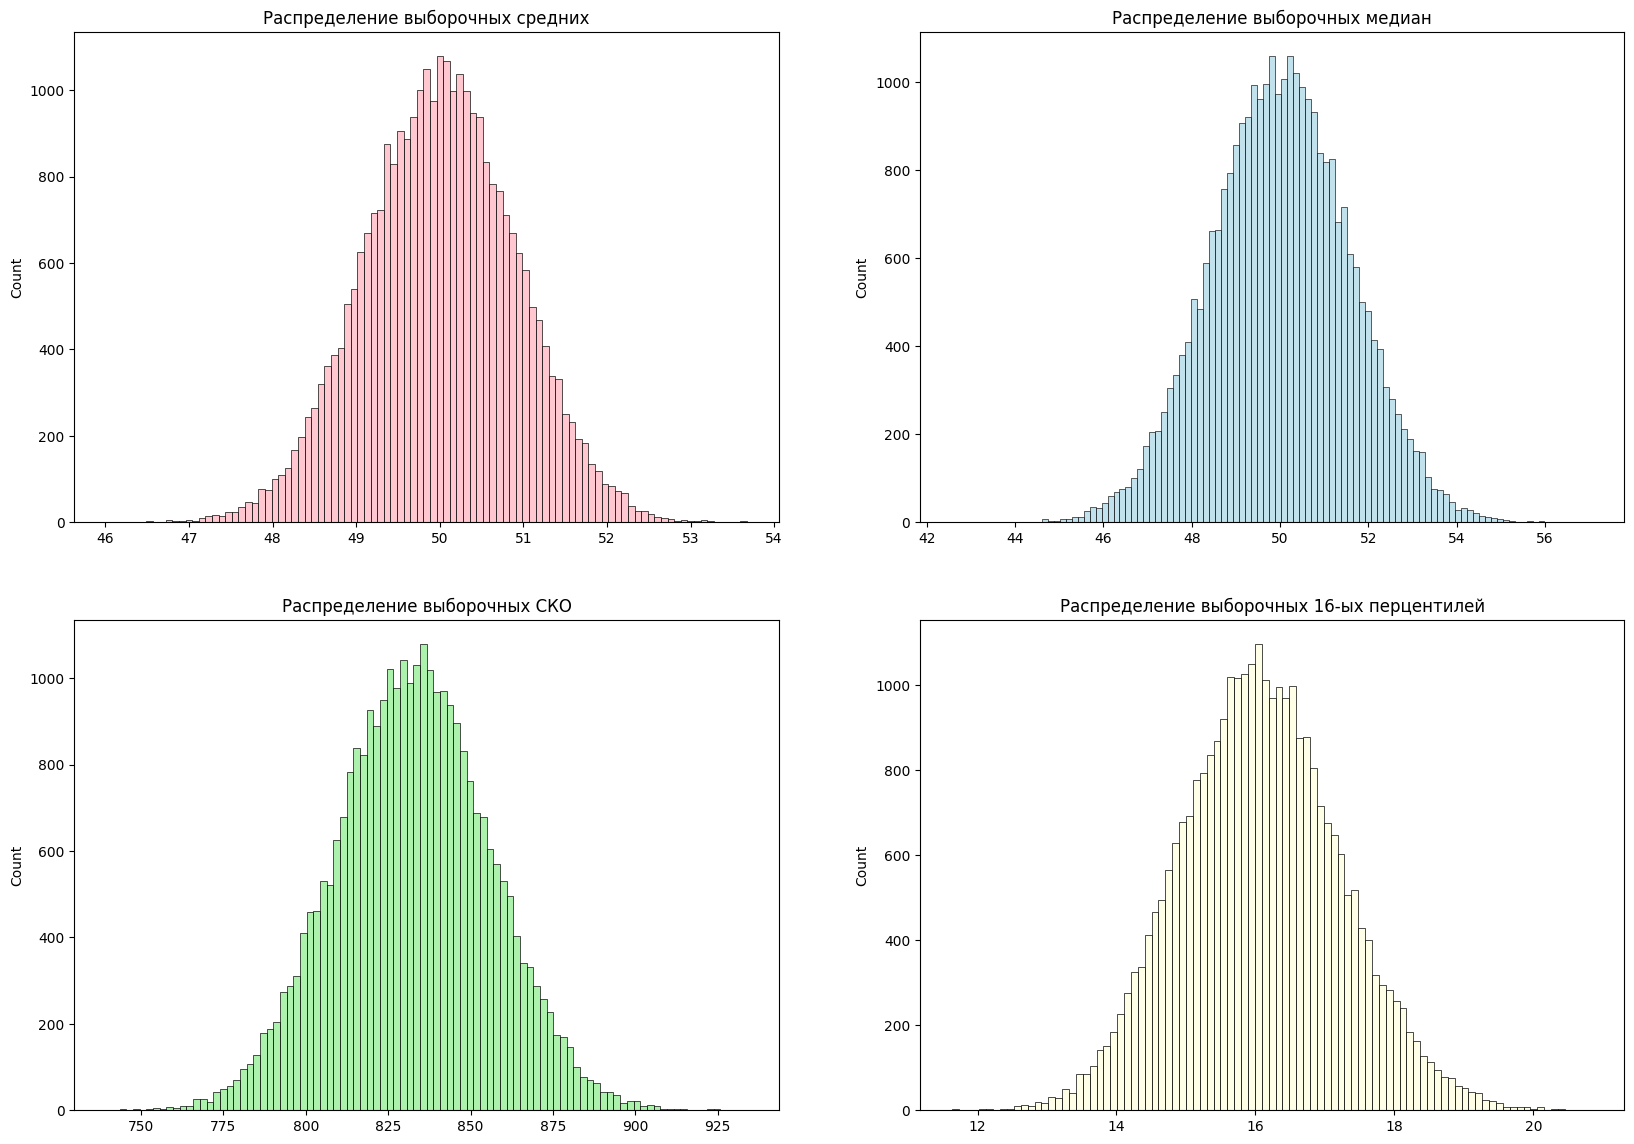

In [87]:
samples = 30000
n = 1000

means = np.zeros(samples)
medians = np.zeros(samples)
variances = np.zeros(samples)
percentiles = np.zeros(samples)
for i in range(samples):
    X = uniform.rvs(0, 100, size=n)
    means[i] = np.mean(X)
    medians[i] = np.median(X)
    variances[i] = np.var(X)
    percentiles[i] = np.percentile(X, 16)

fig, axs = plt.subplots(2, 2, figsize=(20, 14))
sns.histplot(means, color='lightpink', ax=axs.flat[0]).set_title('Распределение выборочных средних')
sns.histplot(medians, color='lightblue', ax=axs.flat[1]).set_title('Распределение выборочных медиан')
sns.histplot(variances, color='lightgreen', ax=axs.flat[2]).set_title('Распределение выборочных СКО')
sns.histplot(percentiles, color='lightyellow', ax=axs.flat[3]).set_title('Распределение выборочных 16-ых перцентилей')